Importation des packages

In [2]:
import pandas as pd
import numpy as np

Lecture des données et première analyse descriptive 

In [4]:
train = pd.read_csv('train.csv',sep=',')
test = pd.read_csv('test.csv',sep=',')
train.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [7]:
train.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,0.500143,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,0.500036,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,0.000000,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,1.000000,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,1.000000,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000


In [29]:
trainCorr = train 
trainCorr_numeric = trainCorr.select_dtypes(include=['int64', 'float64'])
trainCorr_numeric.corr(method='spearman')


# quand on a que des 0 et 1 on fait un khi 2 à la place de la corrélation
# v cramer pour les correlattion pour variable qualitative
# quanti quali : rapport de correlation et visuellement avec des boxplot 
# quanti quanti : correlation spearman (pour non linéaire)
# si j'ai minimum des quali ordinale on peut faire avec spearman


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.010625,-0.002009,-0.008852,0.006794,0.398240,-0.003509,-0.002855,-0.003795,0.002609,-0.006930,0.025654,0.026264,-0.005246,-0.005867,-0.004858,0.003651,0.011421,0.012099
Cholesterol,-0.010625,1.000000,0.006955,-0.018816,-0.026108,0.019753,-0.009607,0.004841,0.011796,-0.007119,-0.008066,-0.030470,0.012264,0.006512,0.022409,-0.009239,0.009241,0.008678,0.020729
Heart Rate,-0.002009,0.006955,1.000000,0.011137,-0.010852,-0.014342,0.007760,-0.003254,0.010689,-0.002081,0.002340,0.004399,-0.021791,0.006937,0.003725,0.010913,-0.000386,0.007163,-0.004571
Diabetes,-0.008852,-0.018816,0.011137,1.000000,-0.011263,0.010390,0.008781,0.009361,-0.007788,-0.012893,-0.006384,-0.002328,0.005080,-0.001897,0.003296,0.015862,-0.004593,-0.017742,0.031538
Family History,0.006794,-0.026108,-0.010852,-0.011263,1.000000,0.009910,-0.005997,0.015970,-0.000570,0.003649,-0.003134,0.014484,0.010036,0.002104,-0.005824,-0.009424,-0.002867,-0.005470,-0.005145
Smoking,0.398240,0.019753,-0.014342,0.010390,0.009910,1.000000,0.012536,0.003997,-0.001922,0.000142,-0.010665,0.003657,0.021811,0.003788,0.005280,-0.004849,-0.008608,0.004640,-0.005188
Obesity,-0.003509,-0.009607,0.007760,0.008781,-0.005997,0.012536,1.000000,-0.028433,0.009307,0.001425,0.003709,0.007311,-0.006903,-0.018534,0.003104,0.012911,-0.005703,-0.009351,-0.012291
Alcohol Consumption,-0.002855,0.004841,-0.003254,0.009361,0.015970,0.003997,-0.028433,1.000000,-0.011631,0.003632,0.001688,-0.000430,-0.005448,-0.020654,0.006058,0.002857,0.001140,0.001768,-0.009732
Exercise Hours Per Week,-0.003795,0.011796,0.010689,-0.007788,-0.000570,-0.001922,0.009307,-0.011631,1.000000,0.009818,-0.009024,-0.009851,0.003340,-0.022911,-0.009763,0.000731,-0.000305,-0.001317,0.015978
Previous Heart Problems,0.002609,-0.007119,-0.002081,-0.012893,0.003649,0.000142,0.001425,0.003632,0.009818,1.000000,0.012840,-0.015676,0.010720,0.008795,0.019457,-0.017310,0.008587,0.004601,0.013482


In [31]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


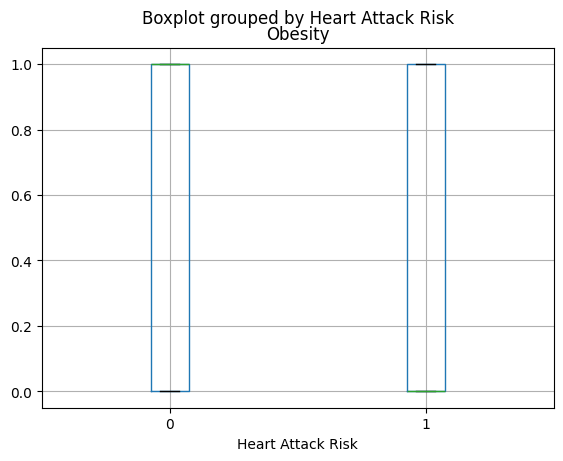

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

trainCorr_numeric.boxplot('Obesity',by = 'Heart Attack Risk')
plt.show()

# Regression logistique


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df_numeric = train.select_dtypes(include=['int64', 'float64'])

X = df_numeric.drop('Heart Attack Risk', axis=1)
y = df_numeric['Heart Attack Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


print('Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy: 0.64


In [35]:
acc=logreg.score(X_test, y_test)
z=1.96
b=z/(1+z**2/len(y_test))*np.sqrt(acc*(1-acc)/len(y_test)+z**2/(4*len(y_test)**2))
a = 1/(1+z**2/len(y_test))*(acc+z**2/(2*len(y_test)))
print(a-b,a+b)
# intervalle de confiance à 95% de l'accuracy

0.6226494344789497 0.6635609764033872


In [27]:
print(y_test.value_counts())

Heart Attack Risk
0    1353
1     750
Name: count, dtype: int64


In [28]:
750/(1353 +750)

0.3566333808844508